## Wind with Coastline
### May 4, 2014

In [139]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools

In [26]:
grid = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc',mask_and_scale=False)
masked = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
results = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2017m01d01.nc')
Jan1_data = xr.open_dataset('/results/SalishSea/nowcast-green/01jan17/SalishSea_1h_20170101_20170101_grid_T.nc')

1.1363636363636362

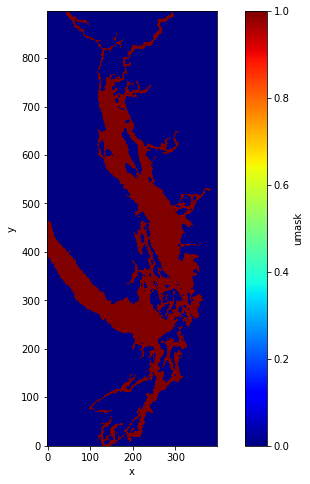

In [128]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
masked.umask.isel(t=0,z=0).plot(cmap = 'jet')
viz_tools.set_aspect(ax)

1.1363636363636362

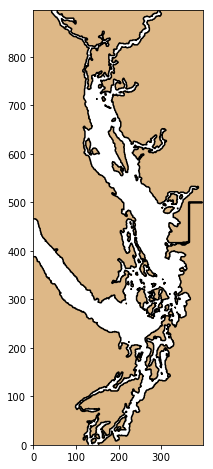

In [3]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
viz_tools.plot_coastline(ax,grid)
viz_tools.plot_land_mask(ax,grid,color='burlywood')
viz_tools.set_aspect(ax)

In [127]:
grid.nav_lat[0]

<xarray.DataArray 'nav_lat' (x: 398)>
array([ 46.859665,  46.861546,  46.863426, ...,  47.597214,  47.599068,
        47.600922])
Dimensions without coordinates: x
Attributes:
    units:    degrees_north

In [132]:
edited1 = results.isel(time_counter = 0).where(results.isel(time_counter = 0).nav_lat >= 46.859665)
edited2 = edited1.where(edited1.nav_lat <= 51.104801)
edited3 = edited2.where(edited2.nav_lon >= -123.429436)
edited4 = edited3.where(edited3.nav_lon <= -126.400291)
edited4.u_wind

/home/vdo/anaconda3/lib/python3.6/site-packages/xarray/core/variable.py:1143: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive
/home/vdo/anaconda3/lib/python3.6/site-packages/xarray/core/variable.py:1143: RuntimeWarning: invalid value encountered in greater_equal
  if not reflexive


<xarray.DataArray 'u_wind' (y: 266, x: 256)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
    time_counter  datetime64[ns] 2017-01-01
  * x             (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * y             (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Attributes:
    short_name:   UGRD_10maboveground
    long_name:    U-Component of Wind
    level:        10 m above ground
    units:        m/s
    coordinates:  longitude latitude

In [111]:
results.isel(time_counter=0).where(results.isel(time_counter=0).nav_lon >= -120)

<xarray.Dataset>
Dimensions:       (x: 256, y: 266)
Coordinates:
    time_counter  datetime64[ns] 2017-01-01
  * x             (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * y             (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Data variables:
    atmpres       (y, x) float64 1.019e+05 1.019e+05 1.019e+05 1.019e+05 ...
    nav_lat       (y, x) float64 45.66 45.67 45.67 45.68 45.68 45.69 45.69 ...
    nav_lon       (y, x) float64 233.0 233.0 233.1 233.1 233.1 233.2 233.2 ...
    precip        (y, x) float64 1.111e-05 1.111e-05 1.528e-05 1.528e-05 ...
    qair          (y, x) float64 0.004424 0.004469 0.004512 0.004562 ...
    solar         (y, x) float64 69.75 64.2 69.75 69.75 69.75 69.75 64.2 ...
    tair          (y, x) float64 281.7 281.7 281.7 281.7 281.7 281.7 281.7 ...
    therm_rad     (y, x) float64 310.3 308.1 308.1 312.5 310.3 314.7 317.0 ...
    u_wind        (y, x) float64 9.022 9.042 9.102 9.172 9.252 9.352 9.452 ...
    v_wind        (y, x) f

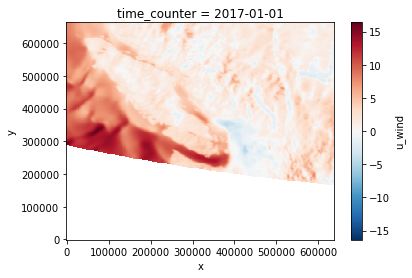

In [113]:
results.isel(time_counter=0).where(results.isel(time_counter=0).nav_lat > 48)

In [68]:
results

<xarray.Dataset>
Dimensions:       (time_counter: 24, x: 256, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2017-01-01 ...
  * x             (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * y             (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Data variables:
    atmpres       (time_counter, y, x) float64 1.019e+05 1.019e+05 1.019e+05 ...
    nav_lat       (y, x) float64 45.66 45.67 45.67 45.68 45.68 45.69 45.69 ...
    nav_lon       (y, x) float64 233.0 233.0 233.1 233.1 233.1 233.2 233.2 ...
    precip        (time_counter, y, x) float64 1.111e-05 1.111e-05 1.528e-05 ...
    qair          (time_counter, y, x) float64 0.004424 0.004469 0.004512 ...
    solar         (time_counter, y, x) float64 69.75 64.2 69.75 69.75 69.75 ...
    tair          (time_counter, y, x) float64 281.7 281.7 281.7 281.7 281.7 ...
    therm_rad     (time_counter, y, x) float64 310.3 308.1 308.1 312.5 310.3 ...
    u_wind        (time_counter, y, x) float64 9

In [64]:
results.nav_lon

<xarray.DataArray 'nav_lon' (y: 266, x: 256)>
array([[ 233.015505,  233.044203,  233.072909, ...,  240.469446,  240.499528,
         240.529613],
       [ 233.008355,  233.037067,  233.065786, ...,  240.466001,  240.496098,
         240.526199],
       [ 233.001198,  233.029924,  233.058656, ...,  240.462552,  240.492665,
         240.522782],
       ..., 
       [ 230.852004,  230.884699,  230.917405, ...,  239.418864,  239.45368 ,
         239.488502],
       [ 230.842534,  230.875246,  230.907969, ...,  239.414228,  239.449065,
         239.483908],
       [ 230.833052,  230.865782,  230.898522, ...,  239.409586,  239.444444,
         239.479308]])
Coordinates:
  * x        (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 1.5e+04 ...
  * y        (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 1.5e+04 ...
Attributes:
    units:      degrees_east
    long_name:  longitude

In [53]:
results.therm_rad

<xarray.DataArray 'therm_rad' (time_counter: 24, y: 266, x: 256)>
[1634304 values with dtype=float64]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2017-01-01 ...
  * x             (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * y             (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Attributes:
    short_name:   DLWRF_surface
    long_name:    Downward Long-Wave Rad. Flux
    level:        surface
    units:        W/m^2
    coordinates:  longitude latitude

In [7]:
results.u_wind

<xarray.DataArray 'u_wind' (time_counter: 24, y: 266, x: 256)>
[1634304 values with dtype=float64]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2017-01-01 ...
  * x             (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * y             (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Attributes:
    short_name:   UGRD_10maboveground
    long_name:    U-Component of Wind
    level:        10 m above ground
    units:        m/s
    coordinates:  longitude latitude

1.1363636363636362

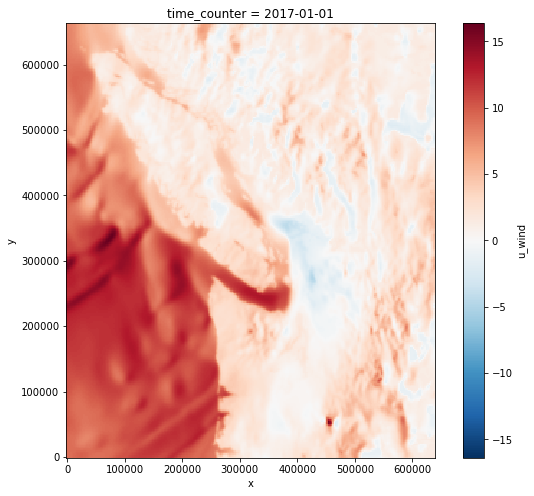

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
results.u_wind.isel(time_counter=0).plot()
viz_tools.set_aspect(ax)

1.1363636363636362

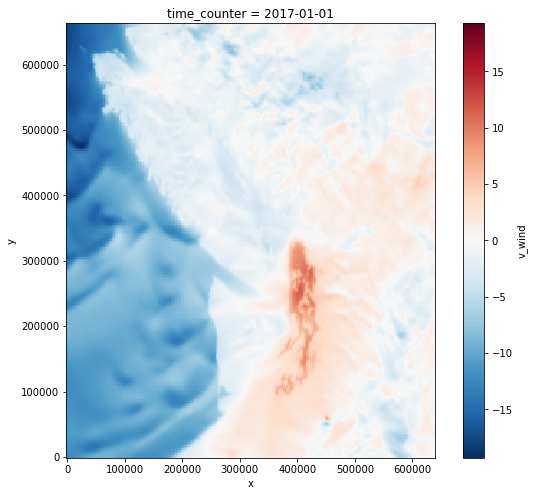

In [134]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
results.v_wind.isel(time_counter=0).plot()
viz_tools.set_aspect(ax)

TypeError: Length of x must be number of columns in z.

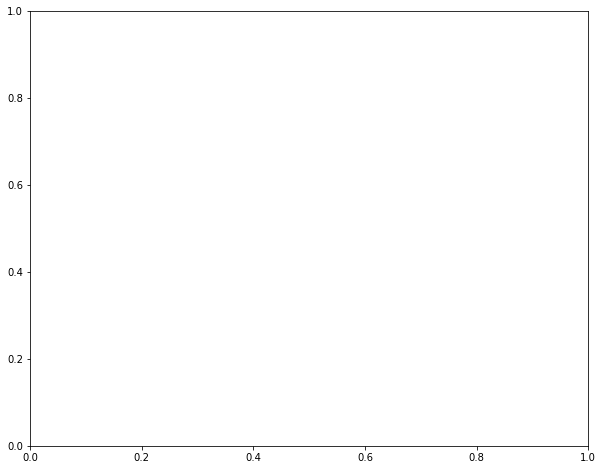

In [133]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
viz_tools.plot_boundary(ax,results,masked)
viz_tools.set_aspect(ax)

In [136]:
masked.where

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    e1f           (t, y, x) float64 413.6 424.0 431.4 437.0 441.4 445.0 ...
    e1t           (t, y, x) float64 397.1 415.8 426.5 433.6 438.9 443.0 ...
    e1u           (t, y, x) float64 406.5 421.1 430.0 436.2 440.9 444.7 ...
    e1v           (t, y, x) float64 407.5 419.7 428.3 434.5 439.4 443.4 ...
    e2f           (t, y, x) float64 455.0 455.0 455.0 455.0 455.0 455.0 ...
    e2t           (t, y, x) float64 455.2 455.1 455.1 455.1 455.1 455.1 ...
    e2u           (t, y, x) float64 455.2 455.1 455.1 455.1 455.1 455.1 ...
    e2v           (t, y, x) float64 455.0 455.0 455.0 455.0 455.0 455.0 ...
    e3t_0         (t, z, y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    e3t_1d        (t, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.001 1.002 ...
    e3u_0         (t, z, y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    e3v_0         (t, z, y, x

In [138]:
grid

<xarray.Dataset>
Dimensions:     (x: 398, y: 898)
Dimensions without coordinates: x, y
Data variables:
    nav_lon     (y, x) float64 -123.4 -123.4 -123.4 -123.4 -123.4 -123.4 ...
    nav_lat     (y, x) float64 46.86 46.86 46.86 46.87 46.87 46.87 46.87 ...
    Bathymetry  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    history:      \n[2013-10-30 13:18] Created netCDF4 zlib=True dataset.\n[2...
    conventions:  \nCF-1.6
    title:        \nSalish Sea NEMO Bathymetry
    institution:   \nDept of Earth, Ocean & Atmospheric Sciences, University ...
    references:   \nhttps://bitbucket.org/salishsea/nemo-forcing/src/tip/grid...
    comment:      \nBased on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oc...
    source:       \nhttps://bitbucket.org/salishsea/tools/src/tip/bathymetry/...

In [149]:
geo_tools.find_closest_model_point(-123.429,46.8597,masked.nav_lon,masked.nav_lat)

(0, 0)

In [146]:
masked

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    e1f           (t, y, x) float64 413.6 424.0 431.4 437.0 441.4 445.0 ...
    e1t           (t, y, x) float64 397.1 415.8 426.5 433.6 438.9 443.0 ...
    e1u           (t, y, x) float64 406.5 421.1 430.0 436.2 440.9 444.7 ...
    e1v           (t, y, x) float64 407.5 419.7 428.3 434.5 439.4 443.4 ...
    e2f           (t, y, x) float64 455.0 455.0 455.0 455.0 455.0 455.0 ...
    e2t           (t, y, x) float64 455.2 455.1 455.1 455.1 455.1 455.1 ...
    e2u           (t, y, x) float64 455.2 455.1 455.1 455.1 455.1 455.1 ...
    e2v           (t, y, x) float64 455.0 455.0 455.0 455.0 455.0 455.0 ...
    e3t_0         (t, z, y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    e3t_1d        (t, z) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.001 1.002 ...
    e3u_0         (t, z, y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    e3v_0         (t, z, y, x

In [141]:
results

<xarray.Dataset>
Dimensions:       (time_counter: 24, x: 256, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2017-01-01 ...
  * x             (x) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * y             (y) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Data variables:
    atmpres       (time_counter, y, x) float64 1.019e+05 1.019e+05 1.019e+05 ...
    nav_lat       (y, x) float64 45.66 45.67 45.67 45.68 45.68 45.69 45.69 ...
    nav_lon       (y, x) float64 233.0 233.0 233.1 233.1 233.1 233.2 233.2 ...
    precip        (time_counter, y, x) float64 1.111e-05 1.111e-05 1.528e-05 ...
    qair          (time_counter, y, x) float64 0.004424 0.004469 0.004512 ...
    solar         (time_counter, y, x) float64 69.75 64.2 69.75 69.75 69.75 ...
    tair          (time_counter, y, x) float64 281.7 281.7 281.7 281.7 281.7 ...
    therm_rad     (time_counter, y, x) float64 310.3 308.1 308.1 312.5 310.3 ...
    u_wind        (time_counter, y, x) float64 9